#### Nombre: Marcus Alexander Mayorga Martínez
#### Fecha: 15 de junio del 2025

###### Respositorio de github: https://github.com/GamersEC/autonomos-programacion

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Estilo de las visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#Cargar dataset
try:
    df = pd.read_csv('bestSelling_games.csv')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'bestSelling_games.csv' no se encontró. Asegúrate de que esté en el mismo directorio.")

#Vista previa del dataset
print("Vista previa del dataset:")
display(df.head())

#Información general del dataset
print("\nInformación general del dataset:")
df.info()

Dataset cargado exitosamente.
Vista previa del dataset:


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Us™ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_name            2380 non-null   object 
 1   reviews_like_rate    2380 non-null   int64  
 2   all_reviews_number   2380 non-null   int64  
 3   release_date         2380 non-null   object 
 4   developer            2380 non-null   object 
 5   user_defined_tags    2380 non-null   object 
 6   supported_os         2380 non-null   object 
 7   supported_languages  2380 non-null   object 
 8   price                2380 non-null   float64
 9   other_features       2380 non-null   object 
 10  age_restriction      2380 non-null   int64  
 11  rating               2380 non-null   float64
 12  difficulty           2380 non-null   int64  
 13  length               2380 non-null   int64  
 14  estimated_downloads  2380 non-null   int64  
dtypes: f

Valores nulos antes de la limpieza:
game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64

Valores nulos después de la limpieza:
game_name              0
reviews_like_rate      0
all_reviews_number     0
release_date           0
developer              0
user_defined_tags      0
supported_os           0
supported_languages    0
price                  0
other_features         0
age_restriction        0
rating                 0
difficulty             0
length                 0
estimated_downloads    0
dtype: int64


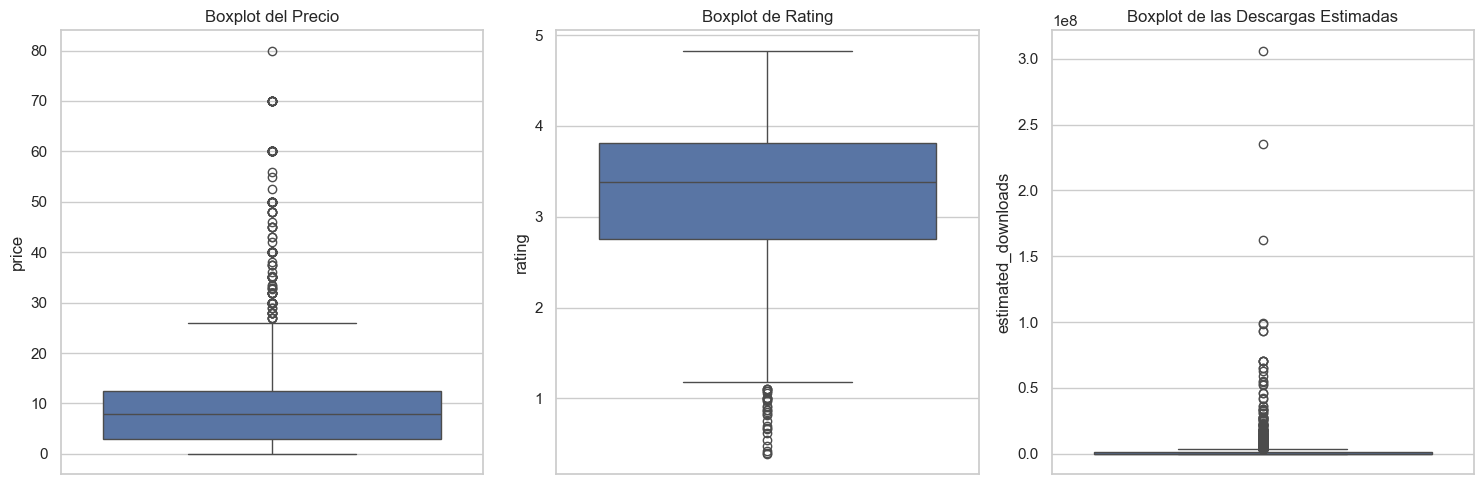

In [19]:
#Valores nulos en el dataset
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

#Completar valores nulos en columnas numéricas con la mediana
df['rating'] = df['rating'].fillna(df['rating'].median())
df['price'] = df['price'].fillna(df['price'].median())

#Completar valores nulos en columnas categóricas con la moda
df['age_restriction'] = df['age_restriction'].fillna(df['age_restriction'].mode()[0])

print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())

#Indentificar outliers en columnas numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['price'])
plt.title('Boxplot del Precio')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['rating'])
plt.title('Boxplot de Rating')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['estimated_downloads'])
plt.title('Boxplot de las Descargas Estimadas')

plt.tight_layout()
plt.show()

In [20]:
#Primero, convertimos la columna a una lista de sistemas operativos.
df['os_win'] = df['supported_os'].apply(lambda x: 1 if 'win' in x else 0)
df['os_mac'] = df['supported_os'].apply(lambda x: 1 if 'mac' in x else 0)
df['os_linux'] = df['supported_os'].apply(lambda x: 1 if 'linux' in x else 0)

#Primero, aseguramos que 'age_restriction' sea numérica.
df['is_mature'] = df['age_restriction'].apply(lambda x: 1 if x >= 17 else 0)

#Mostramos los cambios
print("Columnas nuevas creadas:")
display(df[['game_name', 'supported_os', 'os_win', 'os_mac', 'os_linux', 'age_restriction', 'is_mature']].head())

#Mostramos la cantidad de desarrolladores únicos
print(f"\nNúmero de desarrolladores únicos: {df['developer'].nunique()}")

Columnas nuevas creadas:


,game_name,supported_os,os_win,os_mac,os_linux,age_restriction,is_mature
0,Counter-Strike 2,"win, linux",1,0,1,17,1
1,PUBG: BATTLEGROUNDS,win,1,0,0,13,0
2,ELDEN RING NIGHTREIGN,win,1,0,0,17,1
3,The Last of Us™ Part I,win,1,0,0,17,1
4,Red Dead Redemption 2,win,1,0,0,17,1



Número de desarrolladores únicos: 1806


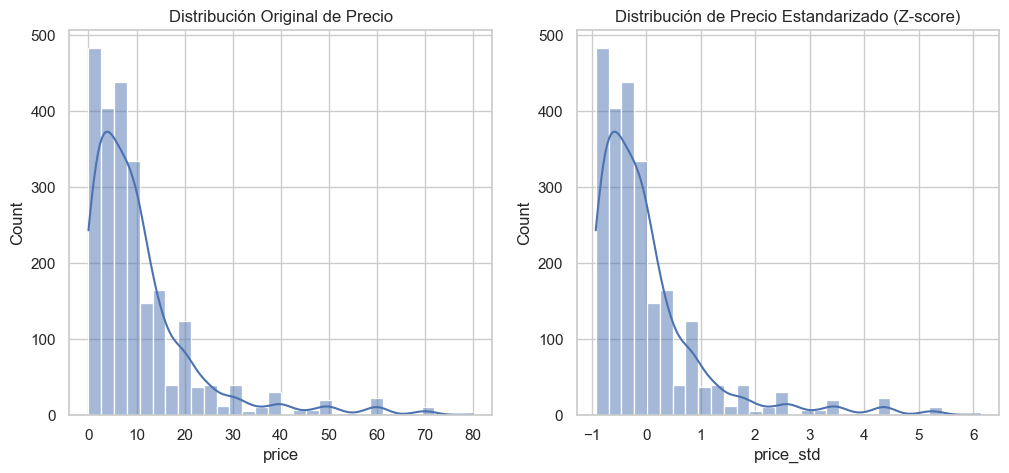

In [21]:
#Seleccionamos las columnas numéricas a escalar
numeric_cols = ['reviews_like_rate', 'all_reviews_number', 'price', 'rating', 'length', 'estimated_downloads']
df_numeric = df[numeric_cols].copy()

#Primero, aseguramos que las columnas numéricas no tengan valores nulos
for col in numeric_cols:
    mean_val = df_numeric[col].mean()
    std_val = df_numeric[col].std()
    df[f'{col}_std'] = (df_numeric[col] - mean_val) / std_val

#Normalizamos las columnas numéricas a un rango de [0, 1]
for col in numeric_cols:
    min_val = df_numeric[col].min()
    max_val = df_numeric[col].max()
    df[f'{col}_norm'] = (df_numeric[col] - min_val) / (max_val - min_val)

#Visualizar el efecto de la estandarización en la variable 'price'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribución Original de Precio')

plt.subplot(1, 2, 2)
sns.histplot(df['price_std'], kde=True, bins=30)
plt.title('Distribución de Precio Estandarizado (Z-score)')
plt.show()

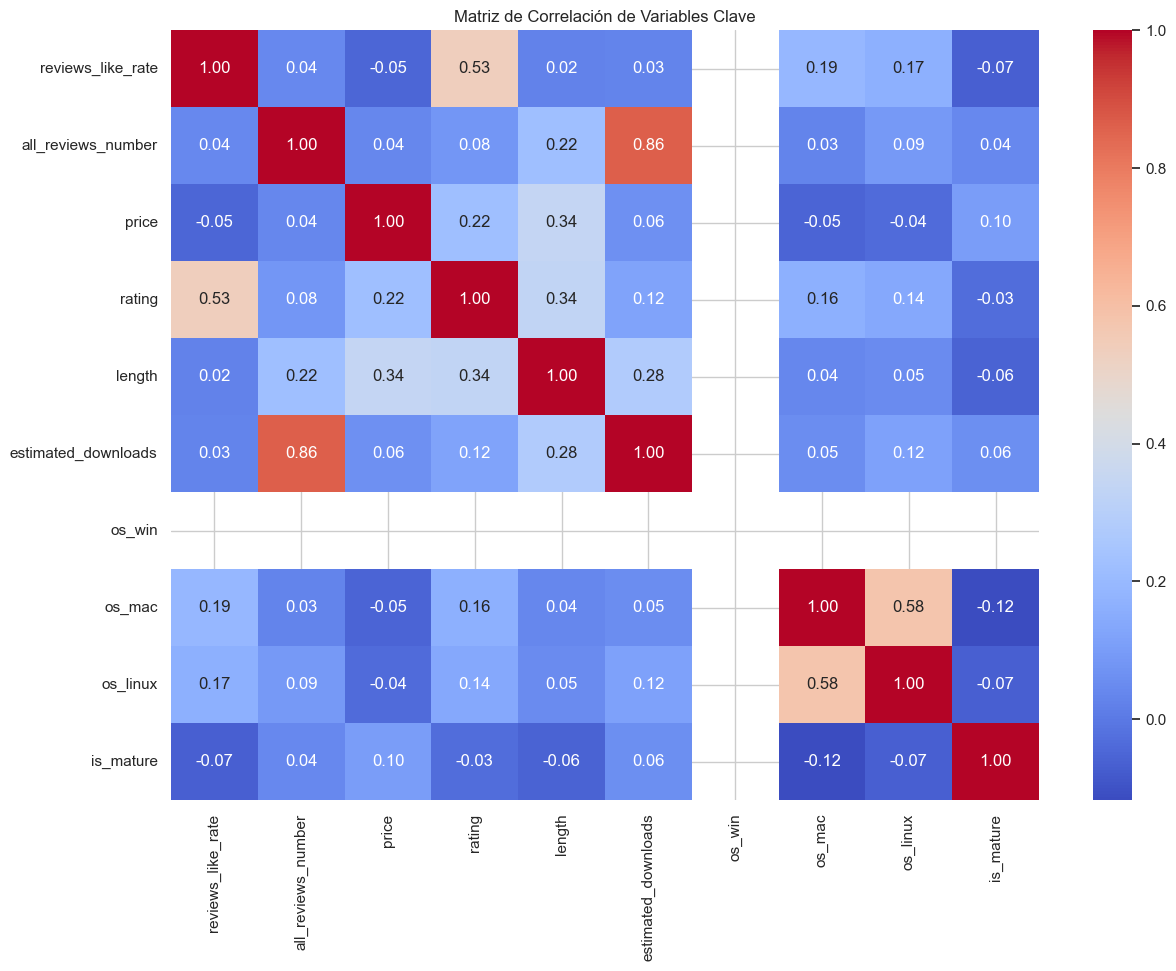

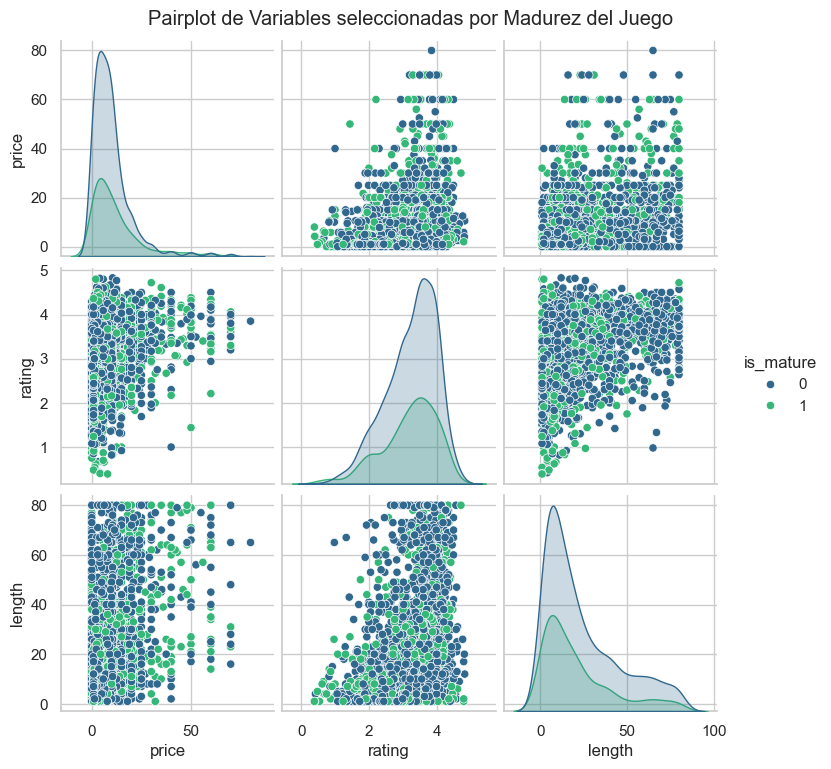

In [22]:
#Seleccionamos las principales variables numéricas originales y las nuevas de SO
cols_for_corr = numeric_cols + ['os_win', 'os_mac', 'os_linux', 'is_mature']
correlation_matrix = df[cols_for_corr].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Clave')
plt.show()

#Usamos un subconjunto de variables para que el gráfico sea legible
pairplot_cols = ['price', 'rating', 'length', 'is_mature']
sns.pairplot(df[pairplot_cols], hue='is_mature', palette='viridis')
plt.suptitle('Pairplot de Variables seleccionadas por Madurez del Juego', y=1.02)
plt.show()

Exactitud (Accuracy) del modelo: 0.6807

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       326
           1       0.43      0.04      0.07       150

    accuracy                           0.68       476
   macro avg       0.56      0.51      0.44       476
weighted avg       0.61      0.68      0.58       476



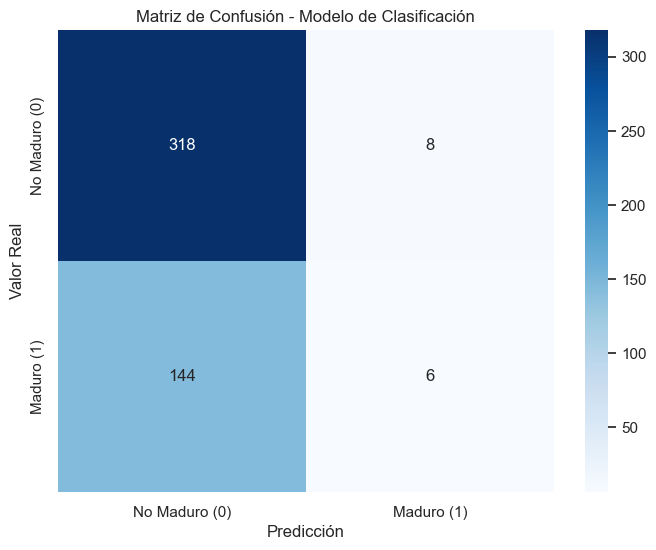

In [23]:
#Implementación del Modelo de Clasificación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Preparación de Datos
#Aseguramos que las variables categóricas estén en formato numérico (one-hot encoding).
features = [
    'reviews_like_rate_std', 'all_reviews_number_std', 'price_std', 'rating_std',
    'length_std', 'os_win', 'os_mac', 'os_linux'
]
target = 'is_mature'

X = df[features]
y = df[target]

#Dividimos el dataset en 80% para entrenamiento y 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento del Modelo
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

#Predicción y Evaluación
y_pred_class = log_reg_model.predict(X_test)

#Calcular y mostrar métricas
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Exactitud (Accuracy) del modelo: {accuracy:.4f}\n')

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_class))

#Visualización de Resultados
#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Maduro (0)', 'Maduro (1)'],
            yticklabels=['No Maduro (0)', 'Maduro (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Modelo de Clasificación')
plt.show()

Error Cuadrático Medio (MSE): 132.3425
Error Absoluto Medio (MAE): 7.1450
Coeficiente de Determinación (R²): 0.1115

El MAE indica que el modelo se equivoca, en promedio, en aproximadamente $ 7.14  al predecir el precio.
El R² indica que el modelo explica aproximadamente un 11.2% de la variabilidad del precio.


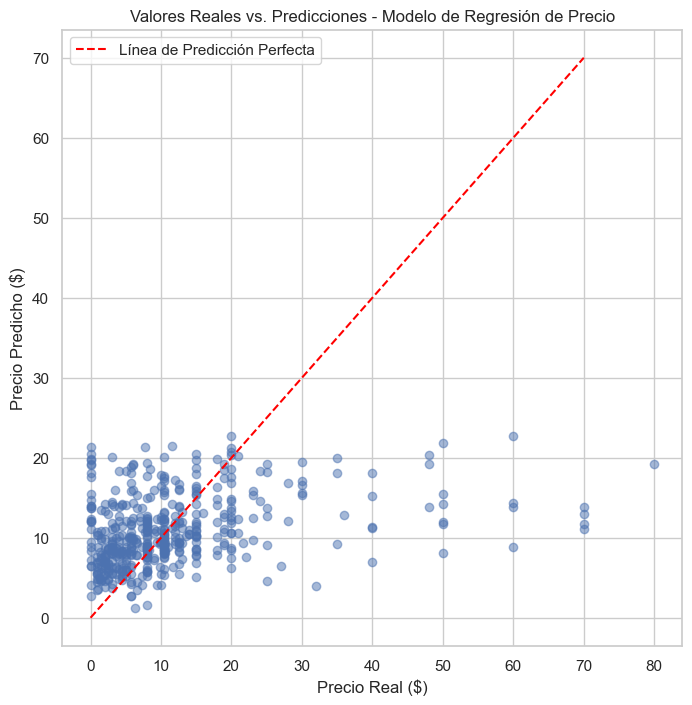

In [24]:
#Implementación del Modelo de Regresión
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Preparación de Datos
#Seleccionamos características y la variable objetivo para el modelo de regresión
features_reg = [
    'rating_norm', 'length_norm', 'estimated_downloads_norm',
    'os_win', 'os_mac', 'os_linux'
]
target_reg = 'price' #La variable a predecir es el precio

X_reg = df[features_reg]
y_reg = df[target_reg]

#División en Train/Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#Entrenamiento del Modelo
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_reg, y_train_reg)

#Predicción y Evaluación
y_pred_reg = lin_reg_model.predict(X_test_reg)

#Calcular y mostrar métricas
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print("\nEl MAE indica que el modelo se equivoca, en promedio, en aproximadamente $", f"{mae:.2f}", " al predecir el precio.")
print("El R² indica que el modelo explica aproximadamente un", f"{r2:.1%}", "de la variabilidad del precio.")

#Visualización de Resultados
#Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 8))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([0, 70], [0, 70], '--', color='red', label='Línea de Predicción Perfecta') # Línea de referencia
plt.title('Valores Reales vs. Predicciones - Modelo de Regresión de Precio')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.legend()
plt.grid(True)
plt.show()